<div style="border:solid green 3px; padding: 20px">

<b>Привет!</b>

Меня зовут Сороколетов Илья и я буду проверять твой проект. 

Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)


Для твоего удобства, я буду выделять свои комментарии следующим образом:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>


Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>

<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 

Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху

Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)

P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
    
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

Импортируем библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

Прочитаем DataSet.

In [2]:
df=pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

In [3]:
pd.set_option('display.max_columns', None)

**Выведим первые 10 строчек датафрейма `df` на экран.**

In [4]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Обрати внимание, что часть столбцов заменилась на "...". Чтобы это исправить, нужно увеличить максимальное количество отображающихся столбцов командой

	pd.set_option('display.max_columns', None)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Выполнено 🙂
</div>

#### Построим общую гистограмму для всех числовых столбцов таблицы

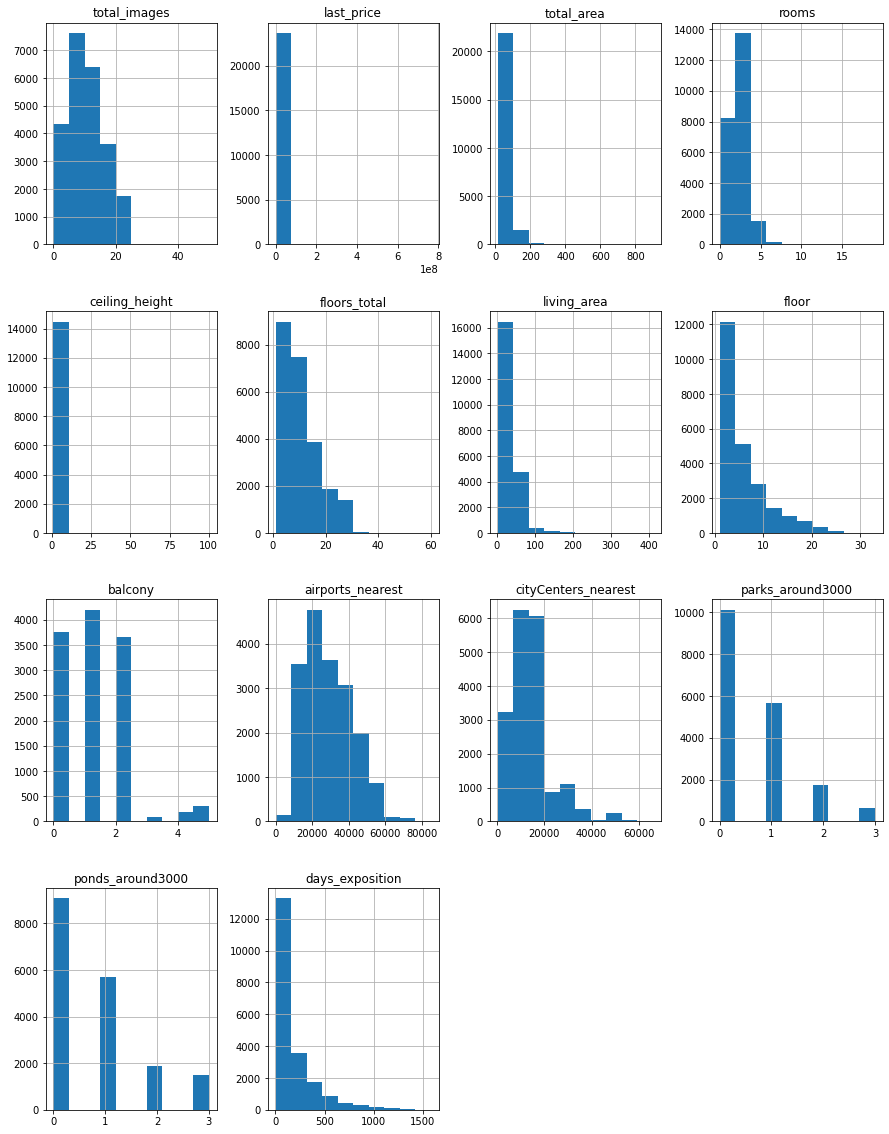

In [5]:
df.drop(columns=['is_apartment','studio','kitchen_area','open_plan','parks_nearest','ponds_nearest']).hist(figsize=(15, 20));

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>
															
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если после кода вызывающего график добавить ";", то мы избавимся от строчки над графиком)

	data.hist(figsize=(15, 20));
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Выполнено, стало симпатичние. 🙂
</div>

#### Выводим основную информацию о датафрейме 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Поверим сумму пропусков в значениях**

In [7]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Просмотрели основную информацию по dataframe **'/datasets/real_estate_data.csv'**

1. **Выводы:** 
    1. Размер датафрема 23699 строк. 
    2. Типы данных object, bool,  float, int.
    3. Выявлена ошибка в типе данных first_day_exposition  
    4. Выявлены пропуски в данных колонок ,`ceiling_height`, `living_area`,  `balcony`, 
    `ceiling_height`, `living_area`,  `is_apartment ` `locality_name`, `days_exposition `.
    
2. **План работ по обработке данных:**
   1. Выполнить замену типов даннных в ячейках first_day_exposition, days_exposition
   2. Заполнить пропущенные данные либо медианными, либо нулевыми значениями там, где это возможно.
   3. Проведем аналитику данных для выявления более востребованного жилья.


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Рекомендую создать универсальную функцию, которая будет на вход принимать датафрейм, а на выходе будет выводить все необходимые характеристики поочередно применяя методы head, describe, info, duplicated и т.п.
</div>

### Предобработка данных

####  Поиск дубликатов

Посчитаем явные дубликаты в таблице:

In [8]:
df.duplicated().sum()

0

Исправим не явные дубликаты в таблице 'locality_name' приведем запись всех городов к нижнему регистру.

In [9]:
df['locality_name']=df['locality_name'].str.lower()

In [10]:
df['locality_name'].unique()


array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [11]:
len(df['locality_name'].unique())

365

In [12]:
def replace_duplicate (list_duplicate,original_name):
    df['locality_name'] = df['locality_name'].replace(list_duplicate,original_name)

In [13]:
replace_duplicate( 'кудрово','деревня кудрово')
replace_duplicate( 'коммунар','поселок коммунары')
replace_duplicate('посёлок городского типа красный бор','поселок городского типа красный бор')
replace_duplicate(['деревня фёдоровское','городской посёлок фёдоровское'],'деревня фёдоровское')
replace_duplicate(['посёлок городского типа лебяжье','поселок городского типа лебяжье'],'посёлок городского типа лебяжье')
replace_duplicate(['поселок городского типа кузьмоловский', 'посёлок городского типа кузьмоловский'],'поселок городского типа кузьмоловский')
replace_duplicate(['кингисепп ', 'поселок кингисеппский'],'кингисепп')
replace_duplicate(['посёлок аннино','поселок аннино'],'посёлок аннино')
replace_duplicate(['поселок городского типа рощино','посёлок городского типа рощино','городской посёлок рощино'],'городской посёлок рощино')
replace_duplicate(['посёлок бугры ', 'поселок бугры'],'поселок бугры')
replace_duplicate([ 'никольское', 'село никольское'], 'село никольское')
replace_duplicate(['поселок новый свет','посёлок новый свет'],'посёлок новый свет')
replace_duplicate(['поселок усть-луга','посёлок усть-луга'],'посёлок усть-луга')
replace_duplicate([ 'село павлово','городской посёлок павлово','посёлок городского типа павлово'],'городской посёлок павлово')
replace_duplicate(['посёлок победа','поселок победа'],'посёлок победа')
replace_duplicate([ 'поселок терволово' ,'посёлок терволово'],'посёлок терволово')
replace_duplicate(['поселок терволово' ,'посёлок терволово'],'посёлок терволово')
replace_duplicate(['поселок городского типа советский','посёлок городского типа советский'],'посёлок городского типа советский')
replace_duplicate(['посёлок петровское' ,'поселок петровское'],'посёлок петровское')
replace_duplicate(['посёлок городского типа токсово', 'поселок городского типа токсово'],'посёлок городского типа токсово')
replace_duplicate(['посёлок тельмана','поселок тельмана'],'посёлок тельмана')
replace_duplicate(['городской поселок большая ижора','поселок городского типа большая ижора'],'городской поселок большая ижора')
replace_duplicate('поселок городского типа имени свердлова','посёлок городского типа имени свердлова')
replace_duplicate('поселок рябово','поселок городского типа рябово ')
replace_duplicate('посёлок поляны','поселок поляны')
replace_duplicate('городской посёлок мга','посёлок городского типа мга')
replace_duplicate('посёлок мичуринское','поселок мичуринское')
replace_duplicate('поселок ильичёво','посёлок ильичёво')
replace_duplicate('посёлок при железнодорожной станции вещево','поселок станции вещево' )
replace_duplicate('посёлок гаврилово','поселок гаврилово')
replace_duplicate('посёлок щеглово','деревня щеглово')
replace_duplicate('деревня рабитицы','поселок рабитицы')
replace_duplicate('городской посёлок назия','поселок городского типа назия')
replace_duplicate('поселок старая малукса','посёлок старая малукса')
replace_duplicate('деревня гарболово','поселок гарболово')
replace_duplicate('посёлок при железнодорожной станции приветнинское','поселок станции приветнинское' )
replace_duplicate('поселок мельниково ','мельниково')
replace_duplicate('любань','поселок любань')
replace_duplicate('поселок стеклянный','посёлок стеклянный')
replace_duplicate('поселок городского типа форносово','посёлок городского типа форносово')
replace_duplicate('посёлок сумино','поселок сумино')
replace_duplicate('посёлок возрождение','поселок возрождение')
replace_duplicate('поселок лисий нос','посёлок лисий нос')
replace_duplicate('поселок жилгородок','посёлок жилгородок')
replace_duplicate('посёлок станции громово','поселок громово')
replace_duplicate('посёлок коробицыно' ,'поселок коробицыно')
replace_duplicate('посёлок кобралово', 'поселок кобралово')
replace_duplicate('поселок лесное' ,'коттеджный посёлок лесное')
replace_duplicate('поселок перово','посёлок перово')
replace_duplicate(['посёлок мурино', 'поселок мурино'], 'мурино')
replace_duplicate('посёлок пансионат зелёный бор','поселок пансионат зелёный бор')
replace_duplicate(['поселок рябово','посёлок городского типа рябово'],'поселок городского типа рябово')

In [14]:
len(df['locality_name'].unique())

315

Неявные дубликаты в столбце 'locality_name были удалены. 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Здесь всё верно, но лучше постараться автоматизировать этот процесс)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Через функцию мой код сваливался в ошибку так как может быть 2 или 3 типа дубликата . Если можете пришлити код функции.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Можно сделать так
    
    for i in data['locality_name'].unique().tolist():
        data.loc[data['locality_name'] == i, 'locality_name'] = i.split()[-1] # оставляем только наименования населенного пункта
</div>

Изменимим тип данных в столбце с object  на datetime

In [15]:
df['first_day_exposition']=pd.to_datetime(df['first_day_exposition'],format="%Y-%m-%dT%H:%M:%S")

#### Обработка аномальных значений ####

**Посмотрим список уникальных значений в  в столбце days_exposition**

In [16]:
df['days_exposition'].unique()


array([  nan,   81.,  558., ..., 1360., 1007.,  971.])

**Аномалий не выявлено. nan заполним на дальнейших этанах.**


**Рассмотрим список уникальных значений в  столбце 'total_images'**

In [17]:
df['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

**В столбце total_images анамалий не выявлено**

**Рассмотрим список уникальных значений в  столбце 'last_price'**

In [18]:
df['last_price'].sort_values().unique()

array([1.219e+04, 4.300e+05, 4.400e+05, ..., 4.013e+08, 4.200e+08,
       7.630e+08])

In [19]:
len(df.query('last_price>=28000000'))

379

**В столбце 'last_price' выявлено 379 аномалий, удалим их.**

In [20]:
df=df.loc[df['last_price']<28000000]

**Рассмотрим список уникальных значений в  столбце 'total_area'**

In [21]:
df['total_area'].sort_values().unique()

array([ 12. ,  13. ,  13.2, ..., 363. , 422.2, 460.8])

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

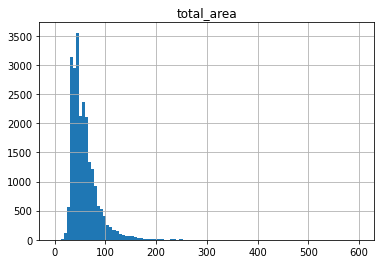

In [22]:
df.hist('total_area',bins=100,range=(0,600))

<AxesSubplot:xlabel='total_area'>

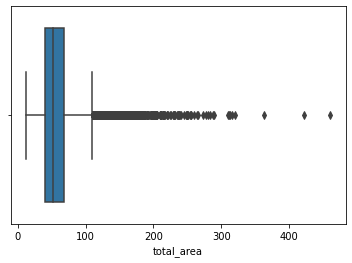

In [23]:
sb.boxplot(x="total_area",data=df)

In [24]:
len(df.query('total_area>200'))


79

In [25]:
len(df.query('total_area<20'))

27

In [26]:
df=df.loc[df['total_area']<200]
df=df.loc[ df['total_area']>20]

**Были выявлен 79 квартиры с аномально болшьшой площадию и 27 квартир с ананамально малой для исключения погрешности удалим эти данные**

**Рассмотрим список уникальных значений в  столбце 'first_day_exposition'**

In [27]:
df['first_day_exposition'].sort_values().unique()

array(['2014-11-27T00:00:00.000000000', '2014-11-29T00:00:00.000000000',
       '2014-12-04T00:00:00.000000000', ...,
       '2019-05-01T00:00:00.000000000', '2019-05-02T00:00:00.000000000',
       '2019-05-03T00:00:00.000000000'], dtype='datetime64[ns]')

**В столбце first_day_exposition анамалий не выявлено**

**Рассмотрим список уникальных значений в  столбце 'rooms'**

In [28]:
df['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 11])

<AxesSubplot:xlabel='rooms'>

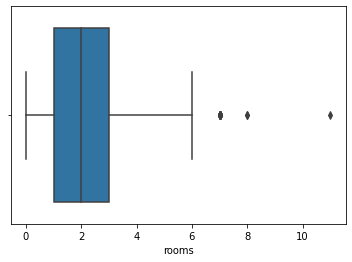

In [29]:
sb.boxplot(x="rooms",data=df)

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

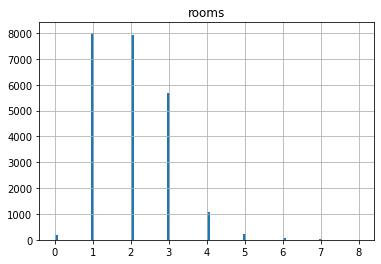

In [30]:
df.hist('rooms',bins=100,range=(0,8))

In [31]:
len(df.query('rooms>=5'))

318

In [32]:
len(df.query('rooms==0'))

186

**Были выявлен  квартиры с аномально высоким количеством комнат 318 и 186 квартиры с отсутствием комнот впринципе . Исправим.**

In [33]:
df=df.loc[df['rooms']<5]
df=df.loc[df['rooms']>0]

**Рассмотрим список уникальных значений в  столбце 'ceiling_height'**

In [34]:
df['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.3 ,   3.31,   3.32,   3.33,
         3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,   3.42,
         3.44,   3.45,   3.46,   3.47,   3.48,   3.49,   3.5 ,   3.52,
      

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

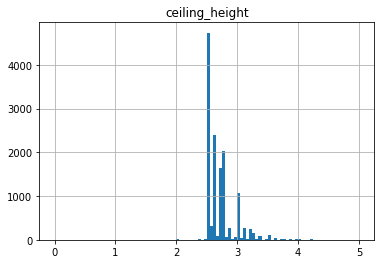

In [35]:
df.hist('ceiling_height',bins=100,range=(0,5))

In [36]:
len(df.query('ceiling_height>3.5'))

219

In [37]:
len(df.query('ceiling_height<=2.4'))

44

**Были выявлены 219 квартиры с аномально высокими потолками и 44 квартир с ананамально низкими потолками для исключения погрешности удалим эти данные.**

In [38]:
df=df.loc[((df['ceiling_height']<3.5)&(df['ceiling_height']>2.4))|(df['ceiling_height'].isna())]


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай ещё заполним пропуски в столбце с высотой потолков, тем более мы можем достаточно точно их восстановить так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Первоначально я заполнял медианой. Но меня смутила гистограма . И я откатил. Сейчас реализуем.  
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

In [39]:
median_flore=df['ceiling_height'].median()

In [40]:
median_flore

2.64

In [41]:
df['ceiling_height']=df['ceiling_height'].fillna(median_flore)

In [42]:
df['ceiling_height'].isna().sum()

0

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Выполнено. 🙂
</div>

**Рассмотрим список уникальных значений в  столбце 'floors_total'**

In [43]:
df['floors_total'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 52., 60., nan])

**В столбце floors_total анамалий не выявлено. Nan заполнить невозможно.**

**Рассмотрим список уникальных значений в  столбце 'living_area'**

In [44]:
df['living_area'].sort_values().unique()

array([  2. ,   3. ,   5.4, ..., 128. , 140. ,   nan])

**В столбце living_area аномалий не выявлено. Nan заполним на другом этапе.**

**Рассмотрим список уникальных значений в  столбце 'floor'**

In [45]:
df['floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

**В столбце floor аномалий не выявлено.**

**Рассмотрим список уникальных значений в  столбце 'studio'**

In [46]:
df['studio'].sort_values().unique()

array([False,  True])

**В столбце 'studio' аномалий не выявлено.**

**Рассмотрим список уникальных значений в  столбце 'kitchen_area'**

In [47]:
df['kitchen_area'].sort_values().unique()

array([ 1.3 ,  2.  ,  2.3 ,  2.89,  3.  ,  3.2 ,  3.3 ,  3.4 ,  3.5 ,
        3.7 ,  3.8 ,  4.  ,  4.1 ,  4.2 ,  4.3 ,  4.4 ,  4.5 ,  4.6 ,
        4.7 ,  4.8 ,  4.9 ,  5.  ,  5.04,  5.06,  5.1 ,  5.14,  5.2 ,
        5.21,  5.23,  5.25,  5.28,  5.29,  5.3 ,  5.31,  5.33,  5.35,
        5.4 ,  5.42,  5.44,  5.47,  5.49,  5.5 ,  5.53,  5.59,  5.6 ,
        5.61,  5.62,  5.64,  5.65,  5.68,  5.7 ,  5.74,  5.75,  5.78,
        5.8 ,  5.82,  5.85,  5.86,  5.9 ,  5.91,  6.  ,  6.02,  6.03,
        6.1 ,  6.16,  6.19,  6.2 ,  6.22,  6.23,  6.24,  6.25,  6.26,
        6.27,  6.28,  6.3 ,  6.31,  6.33,  6.35,  6.36,  6.37,  6.4 ,
        6.47,  6.5 ,  6.55,  6.58,  6.6 ,  6.61,  6.62,  6.65,  6.7 ,
        6.72,  6.73,  6.76,  6.77,  6.8 ,  6.82,  6.83,  6.84,  6.86,
        6.9 ,  6.91,  6.93,  6.95,  7.  ,  7.02,  7.03,  7.06,  7.09,
        7.1 ,  7.12,  7.15,  7.17,  7.18,  7.19,  7.2 ,  7.3 ,  7.36,
        7.4 ,  7.41,  7.48,  7.5 ,  7.54,  7.6 ,  7.63,  7.65,  7.7 ,
        7.71,  7.78,

**В столбце 'kitchen_area' аномалий не выявлено.**

**Рассмотрим список уникальных значений в  столбце 'is_apartment'**

In [48]:
df['is_apartment'].sort_values().unique()

array([False, True, nan], dtype=object)

**В столбце 'is_apartment' аномалий не выявлено.**

**Рассмотрим список уникальных значений в  столбце 'airports_nearest'**

In [49]:
df['airports_nearest'].sort_values().unique()

array([    0.,  6450.,  6914., ..., 84853., 84869.,    nan])

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

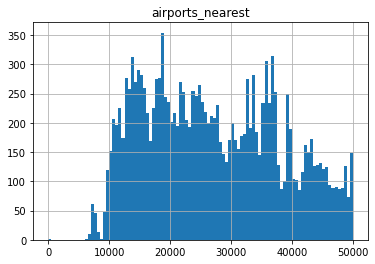

In [50]:
df.hist('airports_nearest',bins=100,range=(0,50000))

**В столбце 'airports_nearest' аномалий не выявлено. Nan заполнить невозможно.**

**Рассмотрим список уникальных значений в  столбце 'cityCenters_nearest'**

In [51]:
df['cityCenters_nearest'].sort_values().unique()

array([  287.,   329.,   387., ..., 65952., 65968.,    nan])

**В столбце 'cityCenters_nearest' аномалий не выявлено. Nan заполнить невозможно.**

**Рассмотрим список уникальных значений в  столбце 'parks_nearest'**

In [52]:
df['parks_nearest'].sort_values().unique()

array([1.000e+00, 3.000e+00, 4.000e+00, 7.000e+00, 9.000e+00, 1.000e+01,
       1.100e+01, 1.200e+01, 1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01,
       1.700e+01, 1.800e+01, 1.900e+01, 2.000e+01, 2.100e+01, 2.200e+01,
       2.300e+01, 2.400e+01, 2.700e+01, 2.800e+01, 3.000e+01, 3.200e+01,
       3.300e+01, 3.400e+01, 3.500e+01, 3.600e+01, 3.700e+01, 3.800e+01,
       3.900e+01, 4.000e+01, 4.100e+01, 4.200e+01, 4.300e+01, 4.400e+01,
       4.500e+01, 4.600e+01, 4.700e+01, 4.800e+01, 4.900e+01, 5.000e+01,
       5.100e+01, 5.200e+01, 5.400e+01, 5.500e+01, 5.600e+01, 5.700e+01,
       5.800e+01, 5.900e+01, 6.000e+01, 6.100e+01, 6.200e+01, 6.300e+01,
       6.400e+01, 6.500e+01, 6.600e+01, 6.700e+01, 6.800e+01, 6.900e+01,
       7.200e+01, 7.300e+01, 7.400e+01, 7.500e+01, 7.600e+01, 7.700e+01,
       7.800e+01, 8.200e+01, 8.300e+01, 8.400e+01, 8.500e+01, 8.600e+01,
       8.700e+01, 8.800e+01, 9.000e+01, 9.100e+01, 9.200e+01, 9.300e+01,
       9.400e+01, 9.500e+01, 9.600e+01, 9.700e+01, 

**В столбце 'parks_nearest' аномалий не выявлено. Nan заполним позже.**

**Рассмотрим список уникальных значений в  столбце 'ponds_nearest'**

In [53]:
df['ponds_nearest'].sort_values().unique()

array([  13.,   16.,   19., ..., 1341., 1344.,   nan])

**В столбце 'ponds_nearest' аномалий не выявлено. Nan заполним позже.**

#### Заполнение пропущенных  значений

In [54]:
df['balcony'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5., nan])

*Заполним пропущенные значения в столбце balcony нулевыми значениями.*

In [55]:
df['balcony']=df['balcony'].fillna(0)

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> отбсолютно согласен. Попустил. 
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Ещё здесь нужно изменить тип данных в столбце balcony
</div>

In [56]:
 df = df.astype({"balcony": "Int64"})

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Выполнено. 🙂
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

Так для недвижимости один из самых основных критериев является место расположения недвижимости и введу малых количетв пропусков всего 49 в колонке locality_name.Избавимся от пропусков методом dropna()          

In [57]:
df=df.dropna (subset=['locality_name'])

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Удалить пропуски в столбце locality_name - это хорошее решение. Как аргумент можно использовать долю пропусков. Если пропусков меньше 1%, то можно их удалить)
</div>

Заполним пропущенные значения в столбце is_apartment значениями False.

In [58]:
df['is_apartment']=df['is_apartment'].fillna(False)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

Рассмотрим уникальные значения в столбцах parks_around3000, parks_nearest, ponds_around3000, ponds_nearest , airports_nearest , cityCenters_nearest

In [59]:
df['parks_around3000'].value_counts()


0.0    9677
1.0    5289
2.0    1510
3.0     489
Name: parks_around3000, dtype: int64

In [60]:
df['ponds_around3000'].value_counts()

0.0    8682
1.0    5341
2.0    1720
3.0    1222
Name: ponds_around3000, dtype: int64

Заполним пропущенные значения в столбце parks_around3000 и ponds_around3000  значениям 0 (обозначающим отсутствие инфраструктуры)

In [61]:

df['parks_around3000']=df['parks_around3000'].fillna(0)
df['ponds_around3000']=df['ponds_around3000'].fillna(0)


 заполним NaN в строках ponds_nearest и parks_nearest условным значение 5000 при условии отсутствия парков прудов поблизости.

In [62]:
df.loc[(df['parks_around3000']==0) & (df['parks_nearest'].isna()),'parks_nearest'] = 5000

df.loc[(df['ponds_around3000']==0) & (df['ponds_nearest'].isna()),'ponds_nearest'] = 5000
    

Проверим.

In [63]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              79
living_area             1771
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            1940
balcony                    0
locality_name              0
airports_nearest        5356
cityCenters_nearest     5336
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         2888
dtype: int64

Так как значений NaN в 'floors_total' всего 86 удалим их. 

In [64]:
df=df.dropna (subset=['floors_total'])


Проверим кореляцию величин в df для поиска взаимосвязий и заполнения пропусков данных.

In [65]:
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.157728,0.119190,0.097469,0.036224,0.017095,0.109054,0.036516,0.012595,-0.016269,-0.010763,0.089682,0.047945,-0.003499,-0.043855,0.027057,-0.034457,0.001841,-0.006159,-0.033583
last_price,0.157728,1.000000,0.772879,0.451191,0.404219,0.134236,0.638080,0.112545,0.011166,-0.016854,-0.000161,0.598283,0.057346,-0.020911,-0.332833,0.265614,-0.276960,0.296580,-0.266414,0.112930
total_area,0.119190,0.772879,1.000000,0.765966,0.338112,-0.001116,0.911169,0.004639,0.015521,-0.028331,-0.000146,0.549056,0.062039,-0.010031,-0.189393,0.143176,-0.141561,0.173207,-0.142571,0.143582
rooms,0.097469,0.451191,0.765966,1.000000,0.135340,-0.199496,0.874010,-0.145355,-0.009695,-0.024686,0.003167,0.142401,0.018315,-0.047011,-0.117036,0.090242,-0.089772,0.075882,-0.063157,0.098021
ceiling_height,0.036224,0.404219,0.338112,0.135340,1.000000,-0.004106,0.277080,-0.000038,0.052388,0.002318,0.011180,0.324492,-0.010547,-0.068365,-0.261441,0.196310,-0.171610,0.190518,-0.147146,0.088634
floors_total,0.017095,0.134236,-0.001116,-0.199496,-0.004106,1.000000,-0.141564,0.676413,-0.018292,0.016522,0.005083,0.254775,0.164219,0.101994,-0.020913,-0.134438,0.106636,-0.026074,-0.021838,-0.041155
living_area,0.109054,0.638080,0.911169,0.874010,0.277080,-0.141564,1.000000,-0.097369,0.001596,-0.020050,0.005168,0.274564,0.024963,-0.042348,-0.172168,0.144809,-0.137878,0.133972,-0.109482,0.125516
floor,0.036516,0.112545,0.004639,-0.145355,-0.000038,0.676413,-0.097369,1.000000,-0.009367,0.011428,0.000743,0.186178,0.164417,0.068869,-0.013980,-0.092114,0.074760,-0.016040,-0.015538,-0.035326
is_apartment,0.012595,0.011166,0.015521,-0.009695,0.052388,-0.018292,0.001596,-0.009367,1.000000,-0.000871,-0.000695,0.022084,0.036672,0.021819,0.023522,-0.006257,0.014294,0.002756,-0.011636,-0.003232
studio,-0.016269,-0.016854,-0.028331,-0.024686,0.002318,0.016522,-0.020050,0.011428,-0.000871,1.000000,-0.000395,NaN,0.015587,0.008435,-0.001864,-0.007961,0.010977,-0.005049,0.004406,-0.011388


Выявленны закономерности :
- living_area от total_area равняется 0.91
- rooms от living_area равняется 0.87
Выводы: крайне высокие значения заимосвязей позволят нам заполнить пропуски в данных столбцах используя мединный коэфициент

Расчитаем медианный коэфициент зависимости размера жилой площади от общей площади

In [66]:
median_living_area=df['living_area'].median()/df['total_area'].median()

Заполним пропуски в столбце 'living_area' 

In [67]:
df['living_area']=df['living_area'].where(~df['living_area'].isna(),df['total_area']*median_living_area)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Прекрасный способ для замены! 👏🏻👏🏻👏🏻
</div>

In [68]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            1897
balcony                    0
locality_name              0
airports_nearest        5348
cityCenters_nearest     5328
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         2880
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22221 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22221 non-null  int64         
 1   last_price            22221 non-null  float64       
 2   total_area            22221 non-null  float64       
 3   first_day_exposition  22221 non-null  datetime64[ns]
 4   rooms                 22221 non-null  int64         
 5   ceiling_height        22221 non-null  float64       
 6   floors_total          22221 non-null  float64       
 7   living_area           22221 non-null  float64       
 8   floor                 22221 non-null  int64         
 9   is_apartment          22221 non-null  bool          
 10  studio                22221 non-null  bool          
 11  open_plan             22221 non-null  bool          
 12  kitchen_area          20324 non-null  float64       
 13  balcony         

**Провели предобработка данных** 
 1. Заполнении пропущенные значения в солбцах 'balcony', 'ponds_around3000', 'ceiling_height',  'ponds_nearest','parks_nearest', 'parks_around3000', 'living_area', is_apartment.
 2. Изменили типы данных в столбцах days_exposition, first_day_exposition,'balcony' 
 3. Оставили пропущенные данные в столбцах ceiling_heigh, airports_nearest, cityCenters_nearest
 4. Устранили неявные дубликаты в столбце locality_name
 5. Проверили данные на выбросы, все аномальные значения удалены
 6. Из 23699 были сохранены 22221
 **Причины пропуска данных:**
 1. Присутствуют элементы с частичным дублированием данных
 2. Есть необязательные поля для заполнения
 **Рекомендации.** 
 1. Запретить регистрировать объявления без адреса. Привязать адреса к Яндекс картам. Запретить ввод адреса вручную. 
 2. Доработать систему авто заполнения из баз данных (на пример количество этажей в доме, высота этажа и т.д.)
 3. Убрать частичное дублирование данных в столбцах



<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Отличная работа в этом разделе! Осталось внести несколько небольших правок
</div>

### Добавление в таблицу новых столбцов

**Рассчитаем среднию цену квадратного метра жилья создадим новый столбец square_meter_price**

In [70]:
df['square_meter_price']=df['last_price']/df['total_area']

**Создадим столбец день недели публикации объявления - day_week**

In [71]:
df['day_week']=df['first_day_exposition'].dt.dayofweek

**Создадим столбец месяц публикации объявления - 'month'**

In [72]:
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month

**Создадим столбец год публикации объявлени - year**


In [73]:
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year

**Выполнить категоризацию этажей в здание создадим столбец - floor_categori**


In [74]:
def categorize_floor (flore,total_flore):
    try:
        if flore == 1:
            return 'первый'
        elif flore == total_flore:
            return 'последний'
        else:
            return 'другой'
     
    except:
        pass

In [75]:
df['floor_category']=df.apply(lambda x: categorize_floor(x.floor, x.floors_total), axis=1)

**Изменим тип данных в графе растояние до центра города с метров в километры.***

In [76]:
def change_m_to_km(distance):
    try:
        return math.ceil(distance/1000)
    except:
        pass

In [77]:
df['cityCenters_nearest_km']=df['cityCenters_nearest'].apply(change_m_to_km)

Проверим.

In [78]:
df['cityCenters_nearest_km'].unique()

array([17., 19., 14.,  9., nan, 20., 12., 16., 52., 34., 31., 15., 11.,
       13., 10.,  3., 33.,  5., 50., 24., 28.,  8., 27.,  7.,  6., 22.,
       51., 18., 53., 49., 35.,  4., 37., 36., 25., 30.,  2., 32., 26.,
       54., 55., 21., 23., 66., 47., 40., 29., 57.,  1., 42., 63., 60.,
       41., 65., 43., 39., 44., 48., 38., 46., 62., 61.])

**Для дальнейшей аналитики данных добавили столбцы:***
1. цена одного квадратного метра;
2. день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
3. 	месяц публикации объявления;
4. 	год публикации объявления;
5. 	тип этажа квартиры (значения — «‎первый», «последний», «другой»);
6. 	расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Проведите исследовательский анализ данных

#### Изучение основных параметры объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

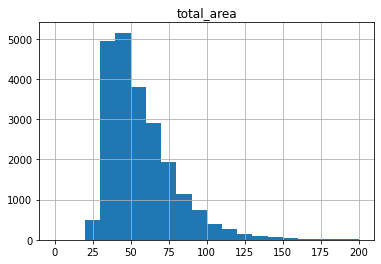

In [79]:
df.hist('total_area',bins=20,range=(0,200))


Изучив гистограмму столбца **'total_area'** можно сделать вывод: Самая популярная недвижимость с площадью от 30 до 50 квадратных метров. Далее наблюдается устойчивый тренд на снижение количества жилья при увеличение его площади данного жилья.

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

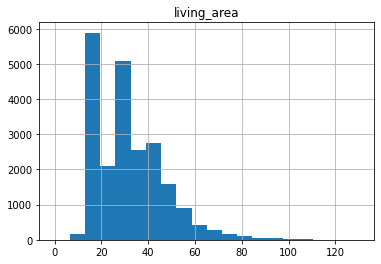

In [80]:
df.hist('living_area',bins=20,range=(0,130))

Изучив гистограмму столбца **living_area** можно сделать вывод: Cамая популярная недвижимость обладает жилой площадью 16-20 и 28-32 квадратных метра что может в принципе соответствовать однокомнатной и двух комнатной квартире. Далее наблюдается устойчивый тренд на снижение количества жилья при увеличение жилой площади аналогично столбцу **'total_area'**

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

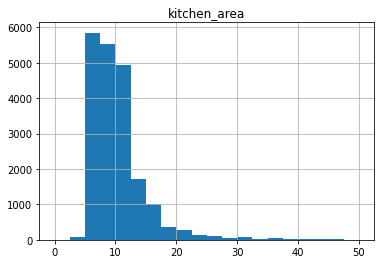

In [81]:
df.hist('kitchen_area',bins=20,range=(0,50))

Изучив гистограмму столбца **kitchen_area** можно сделать вывод: Самая популярная недвижимость с площадью кухни от 5 до 15 квадратных метров. Далее наблюдается устойчивый тренд на снижение количества жилья при увеличение площади кухни аналогично столбцу **'total_area'**.

In [82]:
df['last_price']=df['last_price']/1000000

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Тут можно разделить все значения в столбце last_price на 1 млн, чтобы они пришли в более понятный вид)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Выполнено. 🙂
</div>

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

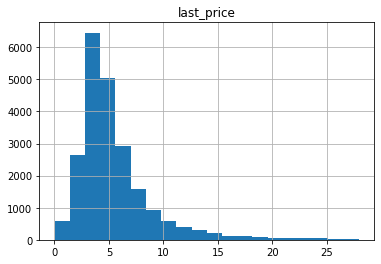

In [83]:
df.hist('last_price',bins=20)

Изучив гистограмму столбца **'last_price'** можно сделать выводы: Гистограмма показывает нормальное распределение, пик гистограммы приходится на 4600000.0.

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

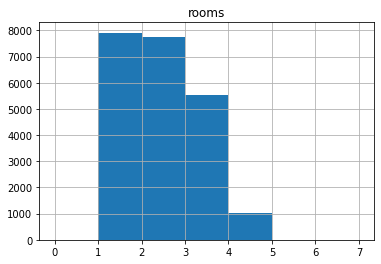

In [84]:
df.hist('rooms',bins=7,range=(0,7))

Изучив гистограмму столбца **'rooms'** можно сделать вывод: Самые популярные квартиры это 1,2 и 3-х комнатные квартиры, аналогичные выводы мы видели при анализе гистограммы столбца **'living_area'**. Далее наблюдается устойчивый тренд на снижение количества жилья при увеличении количества комнат. 

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

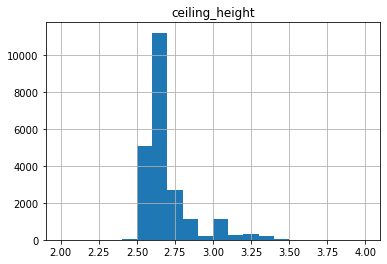

In [85]:
df.hist('ceiling_height',bins=20,range=(2,4)) 

Изучив гистограмму столбца **'ceiling_height'** можно сделать вывод : Высота потолков в большинстве квартир составляет 2.5-2.75 м. 

<AxesSubplot:xlabel='floor_category', ylabel='Count'>

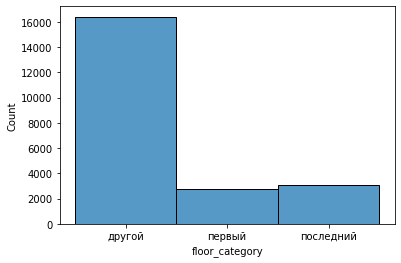

In [86]:
sb.histplot(data=df,x='floor_category')


Изучив гистограмму столбца **'floor_categor'** можно сделать вывод: Доля квартир на первом и последнем этаже составляет не более 25 процентов от всего продаваемого жилья. 

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

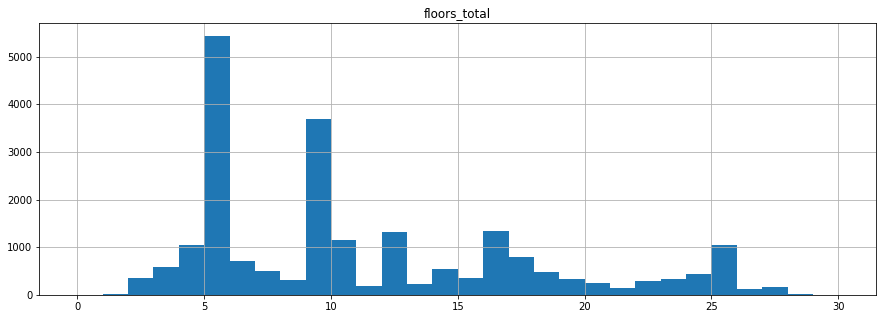

In [87]:
df.hist('floors_total',bins=30,range=(0,30),figsize=(15,5)) 

Изучив гистограмму столбца **'floors_total'** можно сделать вывод: Больше всего квартир продается в пяти и девяти этажных домах что соответствовало типовой застройки в прошлом веке.

array([[<AxesSubplot:title={'center':'cityCenters_nearest'}>]],
      dtype=object)

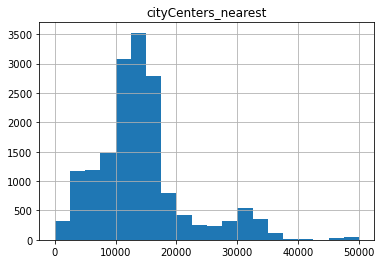

In [88]:
df.hist('cityCenters_nearest',bins=20,range=(0,50000)) 

cityCenters_nearest

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

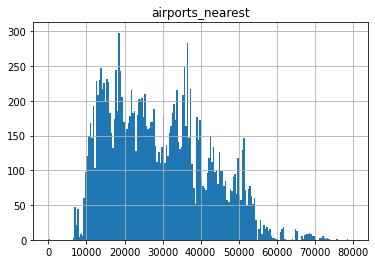

In [89]:
df.hist('airports_nearest',bins=200,range=(0,80000))

Изучив гистограмму столбца **'cityCenters_nearest'** можно сделать вывод: Перед нами практически нормальное распределение количество квартир от расстояния до центра города. Не четкость вероятнее всего связана большим количеством NAN в данном столбце. Пик гистогаммы в районе 13000 метров.


array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

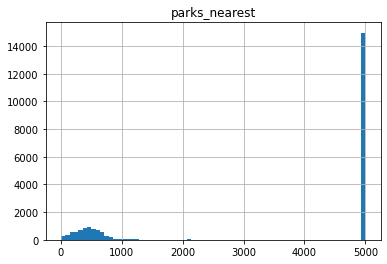

In [90]:
df.hist('parks_nearest',bins=70,range=(0,5000))

Изучив гистограмму столбца **'parks_nearest** можно сделать вывод: Подавляющие количество квартир не имеет доступа к паркам (искусственно заполненные данные). Оригинальные данные показывают нормальное распределение количество квартир  от удаленности от парковых зон.

array([[<AxesSubplot:title={'center':'first_day_exposition'}>]],
      dtype=object)

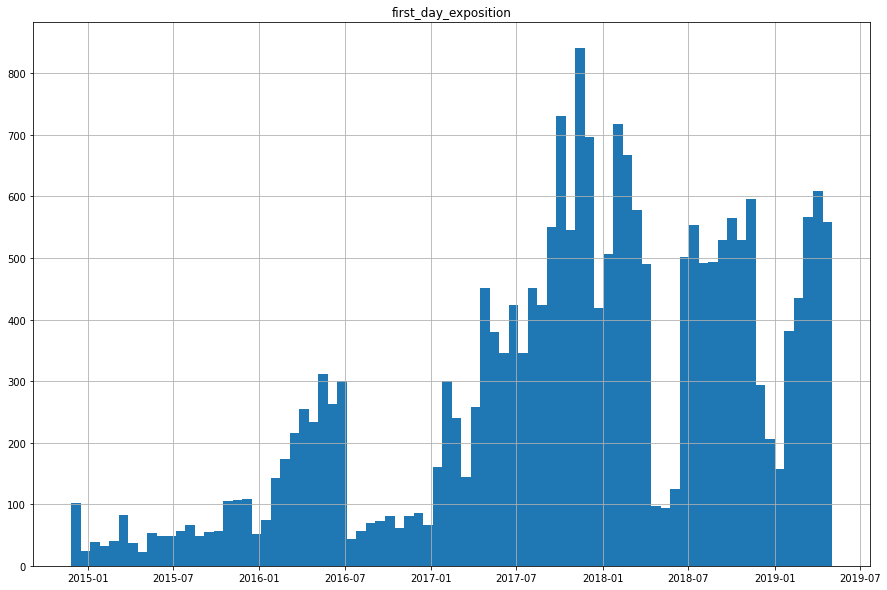

In [91]:
df.hist('first_day_exposition',bins=80,figsize=(15,10))

Изучив гистограмму столбца **'first_day_exposition'** можно сделать вывод: С 2014 до 2018 года наблюдается устойчивый тренд на увеличения продажи жилья, со спадом продаж в 3 и 4 квартале 2016 году (Возможна ошибка в данных ).  Во 2 квартале 2018 был выраженный спад и 1 квартале 2019,2018,2017,2016 (новогодние праздники). Так же наблюдается тренд на падение количества продаваемых квартир от их максимума в 3 квартале 2017 года.

array([[<AxesSubplot:title={'center':'day_week'}>]], dtype=object)

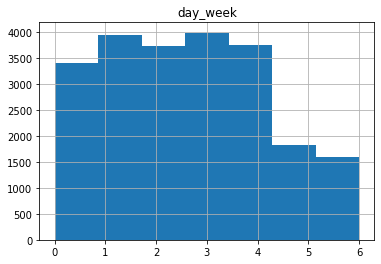

In [92]:
df.hist('day_week',bins=7)

Изучив гистограмму столбца **'day_week'** можно сделать вывод: квартиры чаще всего выставляются на продажу в течение рабочей недели. 

array([[<AxesSubplot:title={'center':'month'}>]], dtype=object)

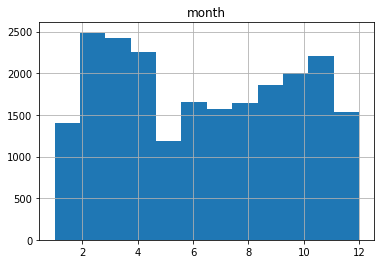

In [93]:
df.hist('month',bins=12)

***Выводы:*** 
  1. Квартиры не ставят на продажу в январе.
  2. С февраля по май выставляют большое количество квартир на продажу
  3. Появление новых обьявлений в летний период  падает на 25 процентов 
  4. В осенние месяцы тренд на продажу увеличивается до ноября 
  5. В декабре идет падение количества новых объявлений
  6. Квартиры чаще всего выставляются на продажу в течение рабочей недели.
 


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! 
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Для того чтобы подписать график мы можем использовать метод plt.title() и в конце кода применить plt.show(). По ссылкам ниже можно почитать подробнее как добавить название для графика или подписать его оси
    
    https://pyprog.pro/mpl/mpl_title.html
    https://pyprog.pro/mpl/mpl_axis_signatures.html 
</div>

#### Проверка скорости продажи квартир.

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

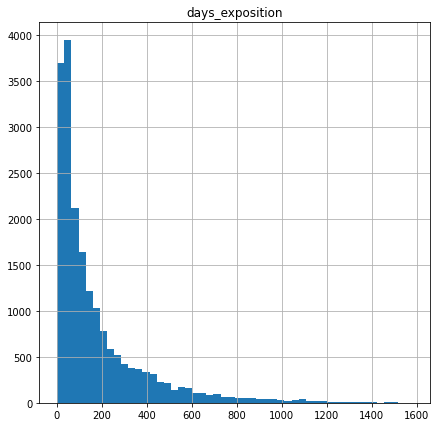

In [94]:
df.hist('days_exposition',bins=50,figsize=(7,7))

<AxesSubplot:xlabel='days_exposition'>

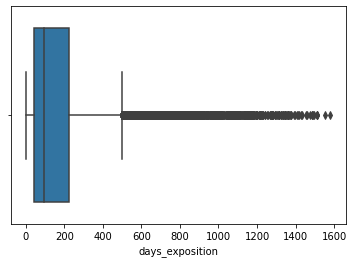

In [95]:
sb.boxplot(x="days_exposition",data=df)

In [96]:
df['days_exposition'].mean()

177.61160229564138

In [97]:
df['days_exposition'].median()

94.0

In [98]:
df['days_exposition'].isna().sum()

2880

**Выводы:**
Изучив коробчатый график и гистограмму столбца days_exposition, рассчитав среднее значение и медианное значение было выявлено: 
1.	Среднее время на продажу квартиры равно 180
2.	Медианное время на продажу равно 95
3.	Аномально время продажи квартиры больше 450 дней
4.	Аномально быстрые продажи можно считать если квартира была продана быстрее чем за 30 дней
5.	3063 квартиры еще не проданы.


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

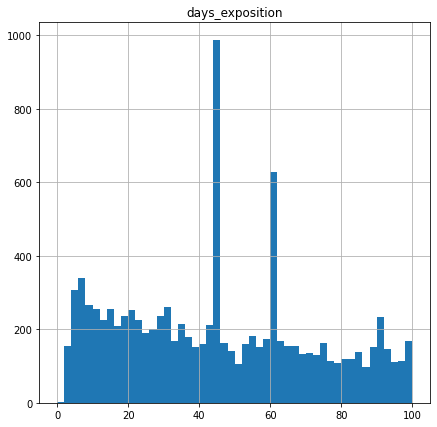

In [99]:
df.hist('days_exposition',bins=50,figsize=(7,7),range=(0,100))

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Выполнено. Пики видны но понять причину не могу. 🙂
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Это особенность функционирования системы размещения объявлений) Убедиться в этом можно по ссылке ниже

	https://yandex.ru/support/realty/owner/home/add-ads-housing.html
</div>

#### Проверка зависимоти цены недвижимости от смежных факторов

Проверим зависимость *'last_price'* от  *'total_area'*

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

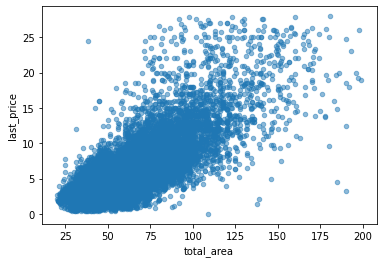

In [100]:
df.plot.scatter (x ='total_area' , y = 'last_price', alpha = 0.5)

**Наблюдаем зависимость двух велчин.**

**Проверим зависимость *'last_price'* от *'living_area'***

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

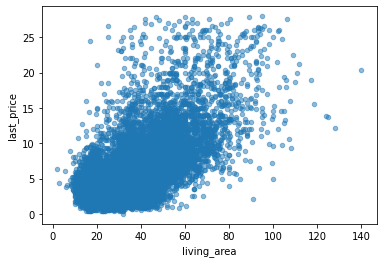

In [101]:
df.plot.scatter (x ='living_area' , y = 'last_price', alpha = 0.5)

**Наблюдаем зависимость двух велчин.**

**Проверим зависимость *'last_price'* от *'kitchen_area'***

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

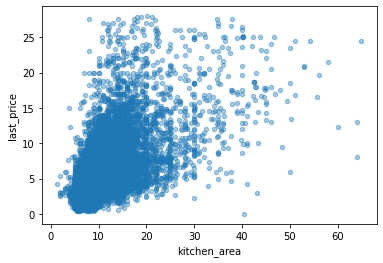

In [102]:
df.plot.scatter (x ='kitchen_area' , y = 'last_price', alpha = 0.4)

**Наблюдается частичная зависимость 'kitchen_area' и 'last_price'.**

**Проверим зависимость *'last_price'* от *'rooms'***

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

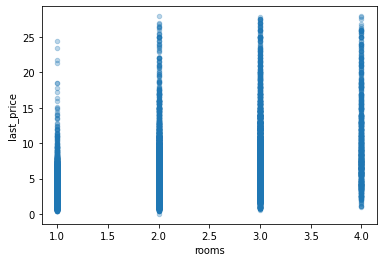

In [103]:
df.plot.scatter (x ='rooms' , y = 'last_price', alpha = 0.3)

**Вывод:**
Наблюдаем зависимость величин. Увеличения цены квартиры при увеличении комнат до 3 шт, но с дальнейшим увеличение количеством комнат цена начинает уменьшаться. 

**Проверим зависимость *'last_price'* от *'floor_category'***

<AxesSubplot:xlabel='floor_category', ylabel='last_price'>

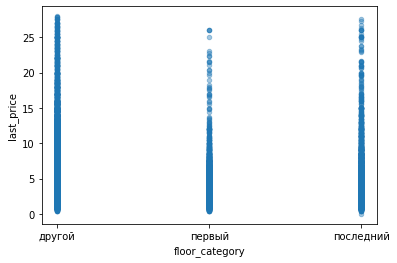

In [104]:
df.plot.scatter (x ='floor_category' , y = 'last_price', alpha = 0.4)

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Выглядит наглядно. Лучше применить  .plot.bar(stacked=True)
</div>

In [105]:
pivot_table_floor_category=pd.pivot_table(df,index='floor_category', values='last_price',
                            aggfunc=[ 'median'])


In [106]:
pivot_table_floor_category.columns=['median']

In [107]:
pivot_table_floor_category

,median
floor_category,
другой,4.75
первый,3.85
последний,4.16


<AxesSubplot:xlabel='floor_category'>

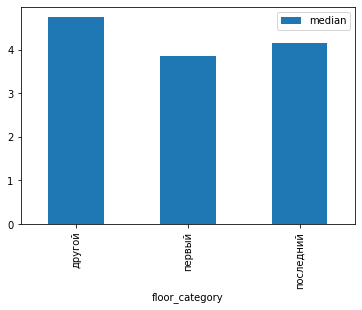

In [108]:
pivot_table_floor_category.plot.bar(stacked=True)

Проверим зависимость 'last_price' от 'floor_category'

Проверим зависимость 'last_price' от 'floor_category'

Проверим зависимость 'last_price' от 'floor_category'

Проверим зависимость 'last_price' от 'floor_category'

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Рассчитывать корреляцию Пирсона для категории этажа, дня, месяца и года продажи не эффективно, так как цена в данном случае зависит от них не линейно. Чтобы изучить зависимость для этих параметров лучше построить bar plot или гистограмму рассчитав среднее значение или медиану
    
    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
    
<br>При таком решении тебе нужно будет делать дополнительную категоризацию этажей как в ячейке 100
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Выполнено. 🙂
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2:</b> 
<br>Осталось аналогично сделать для дня недели, месяца и года, а также удалить рассчет корреляции
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Крайне я не внимательно подошёл к прошлому замечанию😅. Вину осознал. Выводы поправил💪💪. Объём ошибки понятен. 🙂
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b>
<br>Правка выполнена 👍
</div>

**Медианная цена на первый и последний этаж ниже чем на другие этажи.** 

**Проверим зависимость *'last_price'* от *'day_week'***

In [109]:
pivot_table_floor_day_week=pd.pivot_table(df,index='day_week', values='last_price',
                            aggfunc=[ 'median'])

In [110]:
pivot_table_floor_day_week.columns=['median']

In [111]:
pivot_table_floor_day_week

,median
day_week,
0,4.55
1,4.65
2,4.60
3,4.50
4,4.50
5,4.50
6,4.50


<AxesSubplot:xlabel='day_week'>

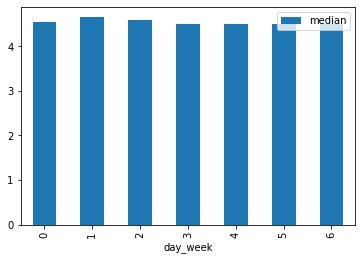

In [112]:
pivot_table_floor_day_week.plot.bar(stacked=True)

**Цены на продажу квартир самые высокие с понедельника по среду, с четверга по воскресенье цена не изменяется и нижи цен из первой категории .**

**Проверим зависимость *'last_price'* от *'month'***

In [113]:
pivot_table_floor_day_month=pd.pivot_table(df,index='month', values='last_price',
                            aggfunc=[ 'median'])

In [114]:
pivot_table_floor_day_month.columns=['median']

In [115]:
pivot_table_floor_day_month

,median
month,
1,4.50
2,4.55
3,4.55
4,4.70
5,4.45
6,4.30
7,4.50
8,4.50
9,4.60


<AxesSubplot:xlabel='month'>

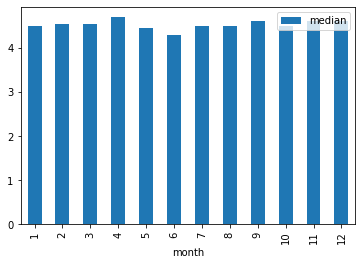

In [116]:
pivot_table_floor_day_month.plot.bar(stacked=True)

**Самые выгодные месяца для продажи недвижимости является  апрель, ноябрь,  сентябрь, декабрь. Спад цен на квартиры происходит в летние месяцы**

**Проверим зависимость *'last_price'* от *'year'***

In [117]:
pivot_table_floor_day_year=pd.pivot_table(df,index='year', values='last_price',
                            aggfunc=[ 'median'])

In [118]:
pivot_table_floor_day_year.columns=['median']

In [119]:
pivot_table_floor_day_year

,median
year,
2014,6.95
2015,5.09
2016,4.40
2017,4.40
2018,4.50
2019,4.96


<AxesSubplot:xlabel='year'>

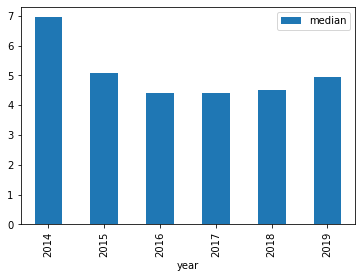

In [120]:
pivot_table_floor_day_year.plot.bar(stacked=True)

**Наблюдается устойчивый спад цены недвижимости с 2014 по 2016, с 2017 по 2019 цены на недвижимость  начали восстанавливаться но так и не достигли уровня 2014 года**

***Общие выводы:***
1.	Цена недвижимости зависит от общей и жилой площади, от площади кухни, от количества комнат 
2.	Цена на первый и последний этаж ниже чем на другие этажи.
3.	Самые выгодные месяца для продажи недвижимости является  апрель, ноябрь,  сентябрь, декабрь. Спад цен на квартиры происходит в летние месяцы.
4.	Наблюдается устойчивый спад цены недвижимости с 2014 по 2016, с 2017 по 2019 цены на недвижимость  начали восстанавливаться но так и не достигли уровня 2014 года
5. Цены на продажу квартир самые высокие с понедельника по среду, с четверга по воскресенье цена не изменяется и нижи цен из первой категории.


#### Расчет средней цены квадратного метра

In [121]:
data_pivot = pd.pivot_table(df, index=['locality_name'], values='square_meter_price', aggfunc=['count', 'mean','median'])
data_pivot.columns=['count','mean','median']

In [122]:
data_pivot=data_pivot.sort_values(by='count',ascending=False).head(10)

In [123]:
data_pivot.sort_values(by='mean',ascending=False)

,count,mean,median
locality_name,,,
санкт-петербург,14531,110014.342206,104000.000000
пушкин,347,101967.262008,99706.744868
деревня кудрово,448,95083.876728,95267.011197
посёлок парголово,322,90448.423806,91984.436588
мурино,555,85582.014495,85322.580645
посёлок шушары,432,78286.820594,76747.967480
колпино,334,75440.286921,74729.185405
гатчина,304,68863.481851,67925.849585
всеволожск,387,68599.948025,65789.473684


In [124]:
data_pivot.sort_values(by='mean',ascending=False)

,count,mean,median
locality_name,,,
санкт-петербург,14531,110014.342206,104000.000000
пушкин,347,101967.262008,99706.744868
деревня кудрово,448,95083.876728,95267.011197
посёлок парголово,322,90448.423806,91984.436588
мурино,555,85582.014495,85322.580645
посёлок шушары,432,78286.820594,76747.967480
колпино,334,75440.286921,74729.185405
гатчина,304,68863.481851,67925.849585
всеволожск,387,68599.948025,65789.473684


In [125]:
data_pivot.sort_values(by='mean')

,count,mean,median
locality_name,,,
выборг,226,58041.752455,58133.213989
всеволожск,387,68599.948025,65789.473684
гатчина,304,68863.481851,67925.849585
колпино,334,75440.286921,74729.185405
посёлок шушары,432,78286.820594,76747.967480
мурино,555,85582.014495,85322.580645
посёлок парголово,322,90448.423806,91984.436588
деревня кудрово,448,95083.876728,95267.011197
пушкин,347,101967.262008,99706.744868


***Выводы:***
1.	Самая большая медиальная цена за квадратный метр жилья в городе Санкт-Петербург, Пушкин, деревне Кудрово.
2.	Самая малая медианная цена за квадратный метр жилья вгороде Выборг, Всеволожск, Гатчина.


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Тебе сначала нужно найти топ10 населённых пунктов по количеству объявлений и уже в этом списке рассчитать среднюю стоимость за квадратный метр и выделить топ1 и топ10
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Осознал .
Выполнил. 👌   
    
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Всё верно! Как вариант, тут можно построить барплот для топ10, так будет более наглядно)
</div>

#### Расчет зависимоти цены от удаленности от центра

Создадим новый датасет.

In [126]:
new_df = df[['locality_name', 'cityCenters_nearest_km', 'square_meter_price']].copy()

Отфильтруем но городу 'Санкт-Петербург'.

In [127]:
new_df = new_df[new_df['locality_name'] == 'санкт-петербург']

Создадим новый столбец price_for_km.

In [128]:
pivot_km_coast=pd.pivot_table(new_df,index='cityCenters_nearest_km', values='square_meter_price',aggfunc=['mean', 'median'])

In [129]:
pivot_km_coast.columns=['square_meter_price_mean','square_meter_price_median']

Посмотрим результат.

In [130]:
pivot_km_coast

,square_meter_price_mean,square_meter_price_median
cityCenters_nearest_km,,
1.0,126147.792842,117283.950617
2.0,131663.071280,122448.979592
3.0,122876.805989,115260.785576
4.0,120491.315610,109945.054945
5.0,132345.823753,126112.759644
6.0,133504.958405,124475.524476
7.0,130958.437233,125000.000000
8.0,127452.601220,122584.033613
9.0,118735.468859,113386.603790


<AxesSubplot:xlabel='cityCenters_nearest_km'>

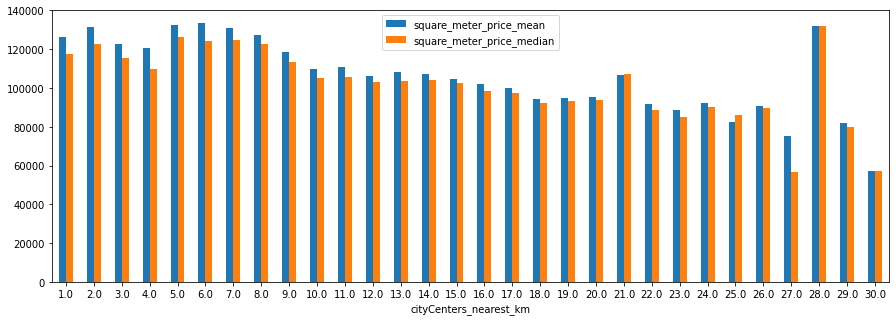

In [131]:
pivot_km_coast.plot.bar(rot = 0,figsize=(15,5))

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Здесь нужно рассчитать стоимость квадратного метра для каждого километра удаляясь от центра. Для этого лучше всего построить сводную таблицу. В index передай расстояние до центра в км, а в values цену за квадратный метр. Можно сравнить среднее значение и медианное
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Выполнено. 🙂
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Красота!
</div>

***Выводы*** : Медианная цена за один квадратный метр недвижимости имеет тренд на падение цены с отдалением от центра. В пределах 8 километров от центра стоимость квадратного метра изменяется не сильно.

### Общий вывод

Был проанализирован dataset предоставленный сервисом Яндекс.Недвижимость.
1. ***Ознакомление с данными***
    1.  Размер датафрема 23699 строк. 
    2. Типы данных object, bool,  float, int.
    3. Выявлена ошибка в типе данных first_day_exposition  
    4. Выявлены пропуски в данных колонок, `ceiling_height`, `living_area`,  `balcony`, 
    `ceiling_height`, `living_area`,  `is_apartment ` `locality_name`, `days_exposition `.
    
2. ***Предобработка данных***
   1. Заполнении пропущенные значения в солбцах 'balcony', 'ponds_around3000', 'ponds_nearest','parks_nearest', 'parks_around3000', 'living_area', is_apartment, ceiling_height.
   2. Изменили типы данных в столбцах days_exposition, first_day_exposition, balcony.
   3. Оставили пропущенные данные в столбцах ceiling_heigh, airports_nearest, cityCenters_nearest
   4. Устранили неявные дубликаты в столбце locality_name
   5. Проверили данные на выбросы, все аномальные значения удалены
   6. Из 22221 были сохранены 22443
3. ***Добавление в таблицу новой информации***:
    - Добавлены столбцы (цена одного квадратного метра; день недели публикации объявления (0 — понедельник, 1 — вторник и так далее); месяц публикации объявления; год публикации объявления;тип этажа квартиры (значения — «‎первый», «последний», «другой»); расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)
4. ***Анализ даннных***
   1. **Анализ гистограмм и графиков, Выводы:**
      1. Квартиры не ставят на продажу в январе.
      2. С февраля по май выставляют большое количество квартир на продажу
      3. Появление новых обьявлений в летний период  падает на 25 процентов 
      4. В осенние месяцы тренд на продажу увеличивается до ноября 
      5. В декабре идет падение количества новых объявлений
      6. Квартиры чаще всего выставляются на продажу в течение рабочей недели.
   2. **Проверка скорости продажи квартир**
      1.	Среднее время на продажу квартиры равно 180
      2.	Медианное время на продажу равно 95
      3.	Аномально время продажи квартиры больше 450 дней
      4.	Аномально быстрые продажи можно считать если квартира была продана быстрее чем за 30 дней
      5.	3063 квартиры еще не проданы.
   3. **Проверка зависимоти цены недвижимости от смежных факторов**
      1***Общие выводы:***
        1.	Цена недвижимости зависит от общей и жилой площади, от площади кухни, от количества комнат 
        2.	Цена на первый и последний этаж ниже чем на другие этажи.
        3.	Самые выгодные месяца для продажи недвижимости является  апрель, ноябрь,  сентябрь, декабрь. Спад цен на квартиры происходит в летние месяцы.
        4.	Наблюдается устойчивый спад цены недвижимости с 2014 по 2016, с 2017 по 2019 цены на недвижимость  начали восстанавливаться но так и не достигли уровня 2014 года
        5. Цены на продажу квартир самые высокие с понедельника по среду, с четверга по воскресенье цена не изменяется и нижи цен из первой категории.
   4. **Расчет средней цены квадратного метра.**
       1.	Самая большая медиальная цена за квадратный метр жилья в городе Санкт-Петербург, Пушкин, деревне Кудрово.
       2.	Самая малая медианная цена за квадратный метр жилья вгороде Выборг, Всеволожск, Гатчина.

   5. **Расчет зависимоти цены от удаленности от центра**
       - Медианная цена за один квадратный метр недвижимости имеет тренд на падение цены с отдалением от центра. В пределах 8 километров от центра стоимость квадратного метра изменяется не сильно.
       
5. ***Рекомендаци***


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>После всех внесённых правок, обязательно перепроверь общий вывод и промежуточные выводы и поправь их по необходимости
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Выполнено. 🙂
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Ты хорошо потрудился, большая часть работы сделана, но остаётся внести следующие правки:
<br>- заполнить пропуски в столбце ceiling_height
<br>- изменить тип данных в столбце balcony
<br>- корректно изучить зависимость цены от категории этажа и времени публикации объявления
<br>- корректно изучить топ10 населённых пунктов с наибольшим числом объявлений
<br>- корректно рассчитать стоимость каждого километра в последнем шаге
<br>- поправить выводы там, где это необходимо
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Делов я натворил.  В теориии поправил все. Спасибо за помощь. Дайте пожалйсто ответ на вопрос межу 14 и 15 ячейкой
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v2:</b> 
<br>Остались две правки:
<br>- корректно изучить зависимость цены от времени публикации объявления
<br>- поправить выводы там, где это необходимо
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Выполено. Спасибо за функцию 
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v3:</b>
<br>Все правки выполнены. Молодец!
<br>Проделана огромная работа! У тебя подробные, понятные и логичные выводы, которые ты подкрепляешь фактами. Были использованы разные графики и способы, чтобы как можно более тщательно изучить данные и у тебя это получилось! 
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод